# Introduction

This notebook includes a step-by-step explanation and code review of how to perform the statistical survival analysis used to investigate the time required for time-to-failure events to occur.

Part 2:
* *Basics of survival analysis.*

* *Kaplan-Meier fitter according to different groups.*

* *Log-Rank Test with an example.*

* *Cox Regression with an example.*

In the previous article, we explored how we can analyze the probability of survival for patients. However, it is very important for us to know which is the most important factor for survival. That's why in this article, we discuss the Kaplan-Meier Estimator by various groups.

<font color='red'>
Content:
    
1. [Survival Analysis Basics](#1)
    * [How it can be useful to analyze ongoing COVID-19 pandemic data?](#2)
    * [In what areas can survival analysis be used?](#3)
    * [Objectives](#4)
    * [Fundamental Concepts](#5)
    * [Censoring](#6)
    * [Survival and Hazard Functions](#7)
2. [Example 3: Kaplan-Meier Estimetor with Groups](#36)
    * [Create Two Objects of Kaplan-MeierFitter()](#37)
    * [Generate Event_table](#38)
    * [Predicting Survival Probabilities](#39)
    * [Get the Complete List of Survival_probability](#40)
    * [Plot the Graphs](#41)
    * [Cumulative_density](#42)
    * [Plot the Data](#43)
    * [Hazard Function - Data Fitting](#44)
    * [Cumulative Hazard](#45)
    * [Plot the Data for Cumulative Hazard](#46)
    * [Long-Rank Test](#47)
3. [Example 4: Cox Proportional Hazard Model](#48)
    * [Prepare the Data](#49)
    * [Cox Regression](#50)
    * [Plot the Graph for Cox Regression](#51)
    * [Find out median time to event for timeline](#52)

<a id="1"></a> <br>
# Survival Analysis Basics

Survival analysis is a set of games used to find the time it takes for an interesting event to occur and to examine the time it takes for some important event (known as death) to occur. Time can be measured in years, months, weeks or days. The subject of interest can be something of interest. It could be a real death, birth or retirement.

<a id="2"></a> <br>
### How it can be useful to analyze ongoing COVID-19 pandemic data?

We can find;
* the number of days until patients showed COVID-19 symptoms.
* for which age group it's deadlier.
* which threatment has the highest survival probability.
* whetever a person's sex has a significant effect on their survival time.
* the median number of days of survival for patients.

<a id="3"></a> <br>
### In what areas can survival analysis be used? 

Survival analysis is used in a variety of field such as:

* Cancer studies for patients survival time analyses.
* Sociology for “event-history analysis”.
* In Engineering for “failure-time analysis”.
* Time until product failure.
* Time until a warranty claim.
* Time until a process reaches a critical level.
* Time from initial sales contact to a sale.
* Time from employee hire to either termination or quit.
* Time from a salesperson hire to their first sale.

In cancer studies, typical research questions include:

1. What is the impact of certain clinical characteristics on patient’s survival? For example, is there any difference between the group of people who has higher blood sugar and those who don’t?

2. What is the probability that an individual survives a specific period (years, months, days)? For example, given a set of cancer patients, we will be able to tell that if 300(random number) days after the diagnosis of cancer has been passed, then the probability of that person being alive at that time will be 0.7 (random number).

3. Are there differences in survival between groups of patients? For example, let’s say there are 2 groups of people diagnosed with cancer. Those 2 groups were given 2 different kinds of treatments. Now our goal here will be to find out if there is a significant difference between the survival time for those 2 different groups based on the treatment they were given.

<a id="4"></a> <br>
### Objectives 

In cancer studies, most of the survival analyses use the following methods.

1. Kaplan-Meier plots to visualize survival curves.

2. Nelson-Aalen plots to visualize the cumulative hazard.

3. Log-rank test to compare the survival curves of two or more groups

4. Cox proportional hazards regression to find out the effect of different variables like age, sex, weight on survival.

<a id="5"></a> <br>
### Fundamental Concepts

Here, we start by defining fundamental terms of survival analysis, including:

* Survival time and event.
* Censoring of data.
* Survival function and hazard function.
* Survival time and type of events in cancer studies

**Survival Time:** Referred to an amount of time until when a subject is alive or actively participates in a survey.

There are mainly three types of events, including:

**1. Relapse:** A deterioration in someone’s state of health after a temporary improvement.

**2. Progression:** The process of developing or moving gradually towards a more advanced state. ( Improvement in health.)

**3. Death:** The destruction or permanent end of something.

<a id="6"></a> <br>
### Censoring

As mentioned above, survival analysis focuses on the occurrence of an event of interest (e.g., birth, death, retirement). But there is still a possibility that the event may not be observed for various reasons. Such observations are known as censored observations.

Censoring may arise in the following ways:

* A patient has not yet experienced the event of interest (death or relapse in our case) within the study period.
* A patient is not followed anymore.
* If a patient moves to another city, then follow-up might not be possible for the hospital staff.

There are three general types of censoring, right-censoring, left-censoring, and interval-censoring.

**Right Censoring:** The death of the person.

**Left Censoring:** The event can’t be observed for some reason. It includes events that occurred before the experiment started. (e.g., number of days from birth when the kid started walking.)

**Interval Censoring:** When we have data for some intervals only.

<a id="7"></a> <br>
### Survival and Hazard Function

We generally use two related probabilities to analyse survival data.

**1. The Survival Probability**

To find survival probability, we’ll be using survivor function S(t), which is the Kaplan-Meier Estimator. Survival probability is the probability that an individual (e.g., patient) survives from the time origin (e.g., diagnosis of cancer) to a specified future time t. For example, S(200) = 0.7 means that after 200 days has passed since the diagnosis of cancer, the patient’s survival probability has dropped to 0.7. If the person stays alive at the end of an experiment, then that data will be censored.

**2. The Hazard Probability**

The hazard probability, denoted by h(t), is the probability that an individual(e.g., patient) who is under observation at a time t has an event(e.g., death) at that time. For example, If h(200) = 0.7, then it means that the probability of that person being dead at time t=200 days is 0.7.


Note that, in contrast to the survivor function, which focuses on not having an event, the hazard function focuses on the event occurring. I think we can clearly see that higher survival probability and lower hazard probability is good for the patient.

<a id="36"></a> <br>
# Example 3: Kaplan-Meier Estimator with Groups

Let’s divide our data into 2 groups: Male and Female. Our goal here is to check is there any significant difference in survival rate if we divide our data set based on sex.

In [ ]:
!pip install lifelines

In [ ]:
#import libraries:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
#Read the dataset:
data=pd.read_csv("../input/covid19-survival-dataset/SurvivalCovid.csv")
data.head()

In [ ]:
#Organize our data:

#if status=1 -> dead=0
#if status=2 -> dead=1

data.loc[data.status==1, 'dead']=0
data.loc[data.status==2, 'dead']=1

data.head()

<a id="37"></a> <br>
### Create two objects of Kaplan-MeierFitter():

*kmf_m* is for male dataset.

*kmf_f* is for female dataset.

In [ ]:
kmf_m=KaplanMeierFitter()
kmf_f=KaplanMeierFitter()

#Dividing data into groups:
Male=data.query("sex==1")
Female=data.query("sex==2")

#The 1st arg accepts an array or pd.Series of individual survival times
#The 2nd arg accepts an array or pd.Series that indicates if the event interest (or death) occured.

kmf_m.fit(durations=Male["time"],event_observed=Male["dead"],label="Male")
kmf_f.fit(durations=Female["time"],event_observed=Female["dead"],label="Female")

<a id="38"></a> <br>
### Generate event_table:

In [ ]:
kmf_m.event_table

In [ ]:
kmf_f.event_table

<a id="39"></a> <br>
### Predicting survival probabilities:

Now we can predict the survival probability for both the groups.

In [ ]:
kmf_m.predict(11)

In [ ]:
kmf_f.predict(11)

<a id="40"></a> <br>
### Get the complete list of survival_probability:

In [ ]:
kmf_m.survival_function_

In [ ]:
kmf_f.survival_function_

<a id="41"></a> <br>
### Plot the graphs:

In [ ]:
#Plot the survival_function data:

kmf_m.plot()
kmf_f.plot()

plt.xlabel("Days passed")
plt.ylabel("Survival")
plt.title("KMF")

Notice that the probability of a female surviving lung cancer is higher than the probability of a male surviving lung cancer. So from this data, we can say that the medical researchers should focus more on the factors that lead to poor survival rates for male patients.

<a id="42"></a> <br>
### Cumulative_density:

It gives us a probability of a person dying at a certain timeline.

In [ ]:
kmf_m.cumulative_density_

In [ ]:
kmf_f.cumulative_density_

<a id="43"></a> <br>
### Plot the data:

In [ ]:
kmf_m.plot_cumulative_density()
kmf_f.plot_cumulative_density()

<a id="44"></a> <br>
### Hazard function - Data fitting:

In [ ]:
#Hazard function:

from lifelines import NelsonAalenFitter

naf_m=NelsonAalenFitter()
naf_f=NelsonAalenFitter()

naf_m.fit(Male["time"],event_observed=Male["dead"])
naf_f.fit(Female["time"],event_observed=Female["dead"])

<a id="45"></a> <br>
### Cumulative Hazard:

In [ ]:
naf_m.cumulative_hazard_

In [ ]:
naf_f.cumulative_hazard_

<a id="46"></a> <br>
### Plot the data for cumulative hazard:

In [ ]:
naf_m.plot_cumulative_hazard()
naf_f.plot_cumulative_hazard()

In [ ]:
naf_m.predict(100)

In [ ]:
naf_f.predict(100)

<a id="47"></a> <br>
### Log-Rank Test:

Goal: Here, our goal is to see if there is any significant difference between the groups being compared.

Null Hypothesis: The null hypothesis states that there is no significant difference between the groups being studied. If there is a significant difference between these groups, then we have to reject our null hypothesis.

How do we say that there is a significant difference?

The statistical significance is denoted by a p-value between 0 and 1. The smaller the p-value, the greater the statistical difference between groups being studied. Notice that here our goal is to find if there is any difference between the groups we are comparing. If yes, then we can do more research on why there are lower survival chances for a particular group based on various information like their diet, lifestyle, etc.

Less than (5% = 0.05) P-value means that there is a significant difference between the groups that we compared. We can partition our groups based on their sex, age, race, method of treatment, etc.

It’s a test to find out the value of P.

In [ ]:
#Define variables:

T=Male['time']
E=Male['dead']
T1=Female['time']
E1=Female['dead']

from lifelines.statistics import logrank_test

result=logrank_test(T,T1,event_observed_A=E,event_observed_B=E1)
result.print_summary()

Here we’ll compare the survival distributions of two different groups by the famous statistical method of the log-rank test. Here notice that for our groups, the test_statistic equals 10.33, and the P-value indicates (<0.005), which is statistically significant and denotes that we have to reject our null hypothesis and admit that the survival function for both groups is significantly different. The P-value gives us strong evidence that “sex” was associated with survival days. In short, we can say that in our example, “sex” has a major contribution to survival days.

<a id="48"></a> <br>
# Example 4: Cox Proportional Hazard Model

The Cox proportional hazard model is basically a regression model generally used by medical researchers to find out the relationship between the survival time of a subject and one or more predictor variables. In short, we want to find out how different parameters like age, sex, weight, height affects the length of survival for a subject.

In the previous section, we saw Kaplan-Meier, Nelson-Aalen, and Log-Rank Test. But in that, we were only able to consider one variable at a time. And one more thing to notice here is that we were performing operations only on categorical variables like sex, status, etc., which are not generally used for non-categorical data like age, weight, etc. As a solution, we use the Cox proportional hazards regression analysis, which works for both quantitative predictor (non-categorical) variables and categorical variables.

**Why do we need it?**

In medical research, generally, we are considering more than one factor to diagnose a person’s health or survival time, i.e., we generally make use of their sex,  age, blood pressure, and blood sugar to find out if there is any significant difference between those in different groups. For example, if we are grouping our data based on a person’s age, then our goal will be to find out which age group has a higher survival chance. Is that the children’s group, adult’s group, or old person’s group? Now what we need to find is on what basis do we make the group? To find that we use Cox regression and find the coefficients of different parameters. Let’s see how that works!

**Basics of the Cox proportional hazard method:**

The ultimate purpose of the Cox proportional hazard method is to notice how different factors in our dataset impact the event of interest.

**Hazard function:**

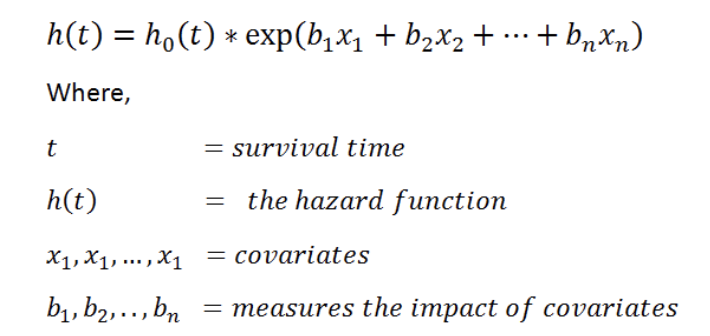

The values exp(bi) is called the hazard ratio (HR). The HR greater than 1 indicates that as the value of ith covariate increases, the event hazard increases, and thus the duration of survival decreases.

In summary,

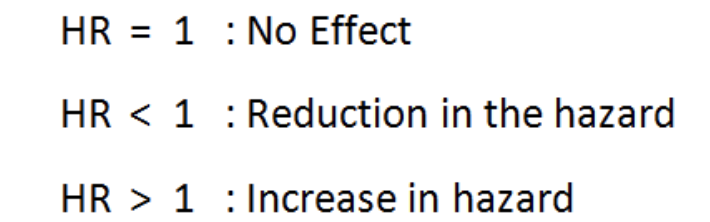

<a id="49"></a> <br>
### Prepare the data:

In [ ]:
#Import required libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

#Read the data file:
data=pd.read_csv("../input/covid19-survival-dataset/SurvivalCovid.csv")
data.head()

Here we need to delete the rows which have null values. Our model can't work on rows which has null values. If we don't preprocess our data, then we might get an error.


In [ ]:
#Delete rows that contain null values:

data=data.dropna(subset=['inst','time','status','age','sex','ph.ecog','ph.karno','pat.karno','meal.cal','wt.loss'])
data.shape
data.head()

In [ ]:
#Create an object:

data.loc[data.status==1,'dead']=0
data.loc[data.status==2,'dead']=1
data.head()

In [ ]:
kmf=KaplanMeierFitter()
kmf.fit(durations=data["time"],event_observed=data["dead"])
kmf.event_table

<a id="50"></a> <br>
### Cox Regression:

In [ ]:
#Import Cox library:
from lifelines import CoxPHFitter

#Parameters we want to consider while fitting our model:
data=data[['time','age','sex','ph.ecog','ph.karno','pat.karno','meal.cal','wt.loss','dead']]

#Fit the data and print the summary:
cph=CoxPHFitter()
cph.fit(data,"time",event_col="dead")
cph.print_summary()

Here notice the p-value of different parameters as we know that a p-value (<0.05) is considered significant. Here you can see that the p-value of sex and ph.ecog are <0.05. So, we can say that we can group our data based on those parameters.

HR (Hazard Ratio) = exp(bi)

The p-value for sex is 0.01 and HR (Hazard Ratio) is 0.57 indicating a strong relationship between the patients’ sex and decreased risk of death. For example, holding the other covariates constant, being female (sex=2) reduces the hazard by a factor of 0.58, or 42%. That means that females have higher survival chances. Notice that we came to this conclusion using a graph in the previous section.

The p-value for ph.ecog is <0.005 and HR is 2.09, indicating a strong relationship between the ph.ecog value and increased risk of death. Holding the other covariates constant, a higher value of ph.ecog is associated with poor survival. Here person with higher ph.ecog value has a 109% higher risk of death. So, in short, we can say that doctors try to reduce the value of ph.ecog by providing relevant medicines.

Now notice that HR for Age is 1.01, which suggests only a 1% increase for the higher age group. So we can say that there is no significant difference between different age groups.

In short,

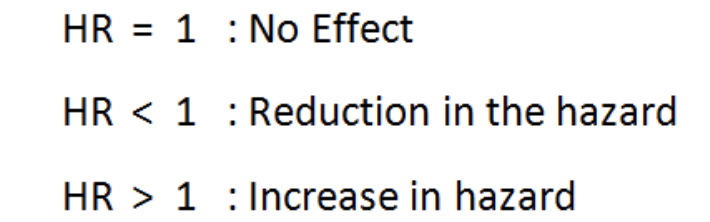

In [ ]:
#Check which factor affects the most from the graph:

cph.plot()

You can clearly see that ph.ecog and sex variables have significant differences.

<a id="51"></a> <br>
### Plot the graph for cox regression:

Here I have plotted the survival probability for different persons in our dataset. Here notice that person-1 has the highest survival chances, and person-3 has the lowest survival chances. If you look at the main data, you can see that person-3 has a higher ph.ecog value.

Here notice that even if person-5 is alive, his/her survival probability is less since he/she has higher ph.ecog value.

In [ ]:
d_data=data.iloc[0:5,:]
cph.predict_survival_function(d_data).plot()

<a id="52"></a> <br>
### Find out median time to event for timeline:

In [ ]:
CTE=kmf.conditional_time_to_event_
plt.plot(CTE)

Here notice that as the number of days passed, the median survival time is decreasing.